In [12]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
from astropy.time import Time

x = glob.glob('./additional/*')

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry
from reduct_funcs import funcs_light_curve

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_light_curve)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

q_list = ['q']
q_err_list = ['q error']
u_list = ['u']
q_err_list = ['u error']
v = []
v_err = []

PD_list = []
PD_err_list = []
PA_list = []
PA_err_list = []

MJD_list = [] #For the new data

data_list_eecep = []

with open(x[0]) as f:
    lines = f.readlines()
    
EECEP_data_header = ['q', 'q uncertainty', 
 'u', 'u uncertainty', 
 'v', 'v uncertainty', 
 'PD', 'PD uncertainty', 
 'PA', 'PA uncertainty',
 'Not applicable', 'Not applicable',
 'MJD', 'half observation duration in days',
 'band']

for l in range(0, len(lines)):    
    q =  float(lines[l].split('\t')[0].strip())
    q_err = float(lines[l].split('\t')[1].strip())
    u = float(lines[l].split('\t')[2].strip()) 
    u_err = float(lines[l].split('\t')[3].strip()) 
    
    PD =  float(lines[l].split('\t')[6].strip()) 
    PD_err =  float(lines[l].split('\t')[7].strip())
    
    PA = float(lines[l].split('\t')[8].strip()) 
    PA_err = float(lines[l].split('\t')[9].strip()) 

    MJD = float(lines[l].split('\t')[12].strip())   
    t = Time(MJD, format='mjd', scale='utc')
    
    single_dict={t.iso[:len('2014-08-08')]+'_eecep': (['q',q], 
                                                      ['q error', q_err], 
                                                      ['u', u],
                                                      ['u error', u_err])}
    
    PD_list.append(float(PD))
    PD_err_list.append(float(PD_err))
    
    PA_list.append(float(PA))
    PA_err_list.append(float(PA_err))
    
    MJD_list.append(MJD)
    
    data_list_eecep.append(single_dict)
    
t_MJD_track = Time(MJD_list, format='mjd', scale='utc')
tm_pd = Time(MJD_list, scale='utc',format='mjd')
tm_pa = Time(MJD_list, scale='utc',format='mjd')

lod = []

for files in x:
    df = pd.read_csv(files.replace('\\','\\\\'), sep="\t", header=None)
    lod.append(df)
    print(files.replace('\\','\\\\'), ":", df.shape)

./additional\\EECep_data.txt : (14, 14)
./additional\\EECep_historicalmean.txt : (3, 14)
./additional\\EECep_nightly.txt : (13, 25)
./additional\\EECep_runavg.txt : (5, 15)


In [24]:
#Load all data. With 2021 Data
#2022-02-01
#Interrogative. There may be some things unaccountable for
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")
print(len(target_data)+len(zero_pol_data)+len(high_pol_data), "total")

master_list = target_data+zero_pol_data+high_pol_data
print(len(master_list))

#The function that calibs all the shit
calib_d = funcs_calib_and_plot.calib_pipe(target_data, zero_pol_data, False, False)

(EECep_pd, EECep_pd_err, EECep_PD_MJD_track)=funcs_polarimetry.calc_PD_stability(calib_d , 'perc', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP')
(EECep_pa, EECep_pa_err, EECep_PA_MJD_track)=funcs_polarimetry.calc_PA_stability(calib_d , 'degree', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP', True)

Load all excel data
41 targets
29 zero pols
50 high pols
120 total
120
Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calc Polarization Degree stability
Calc Position Angle stability
Shifting PA...


41

In [2]:
print("PD:", len(lod[0][6]), len(PD_list))
print("PD:", len(lod[0][7]), len(PD_err_list))
print("PA:", len(lod[0][8]), len(PA_list))
print("PA:", len(lod[0][9]), len(PA_err_list), "\n")

for k in range(0, len(PD_list)):
    print( lod[0][12][k])
    print("PD:", PD_list[k], lod[0][6][k], "Diff:", np.round(PD_list[k] - lod[0][6][k]))
    print("PD err:",PD_err_list[k], lod[0][7][k], "Diff:", np.round(PD_list[k] - lod[0][7][k]) )
    
    print("PA:",PA_list[k], lod[0][8][k], "Diff:", np.round(PA_list[k] - lod[0][8][k]))
    print("PA err:",PA_err_list[k], lod[0][9][k], "Diff:", np.round(PA_err_list[k] - lod[0][9][k]), "\n")

PD: 14 14
PD: 14 14
PA: 14 14
PA: 14 14 

56877.633195200004
PD: 0.0278852607487421 0.0278852607487421 Diff: 0.0
PD err: 0.00323148570509178 0.00323148570509178 Diff: 0.0
PA: 30.8311638115272 30.8311638115272 Diff: 0.0
PA err: 3.30443925929192 3.3044392592919203 Diff: -0.0 

56895.7909870362
PD: 0.0357069539395001 0.0357069539395001 Diff: 0.0
PD err: 0.00387796514129384 0.00387796514129384 Diff: 0.0
PA: 41.9638058683685 41.9638058683685 Diff: 0.0
PA err: 3.12070272571876 3.12070272571876 Diff: 0.0 

56896.7428162643
PD: 0.030025514248532 0.030025514248532 Diff: 0.0
PD err: 0.0037389839110655 0.0037389839110655 Diff: 0.0
PA: 41.9056266483271 41.9056266483271 Diff: 0.0
PA err: 3.71334762527003 3.7133476252700297 Diff: 0.0 

56897.576297117404
PD: 0.0230160998875784 0.0230160998875784 Diff: 0.0
PD err: 0.00340970082595683 0.00340970082595683 Diff: 0.0
PA: 48.1598692807272 48.15986928072721 Diff: -0.0
PA err: 4.23343745092219 4.23343745092219 Diff: 0.0 

56897.7919773171
PD: 0.027090831628

In [15]:
#lod[0][0]

#0 1) q
#1 2) uncertainty
#2 3) u
#3 4) uncertainty
#4 5) v
#5 6) uncertainty
#6 7) PD
#7 8) uncertainty
#8 9) PA
#9 10) uncertainty
#10 - 11 11-12) ignore
#12 13) MJD
#13 14) half observation duration in days
#14 15) band (2 = B, 3 = V, 4 = clear)
#15 - 23 16-24) ignore


#I have verified that the new data is valid

In [16]:
#funcs_polarimetry.EECep_stacked_based((lod[0][6], lod[0][7], tm_pd), (lod[0][8], lod[0][9], tm_pa ), 56800 , 59420, False ,True, False, 'o' , '^', True, False)
#funcs_polarimetry.EECep_stacked_based((lod[0][6], lod[0][7], tm_pd), (lod[0][8], lod[0][9], tm_pa), 56850 , 57000, False ,True, False, 'o' , '^', True, False)

Reading: ee_cep_2014.txt


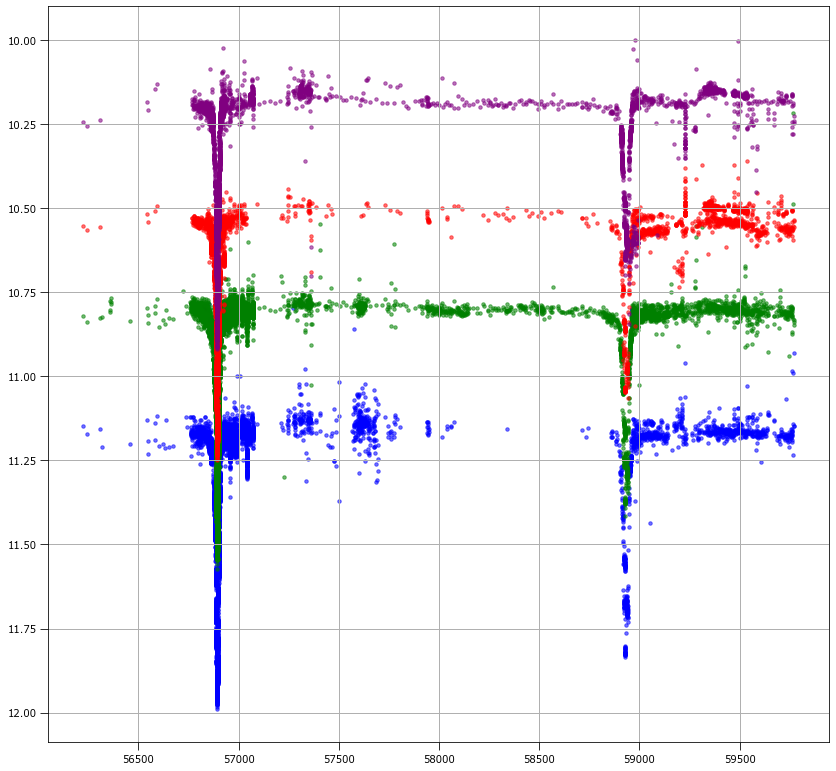

N filtered points: 178


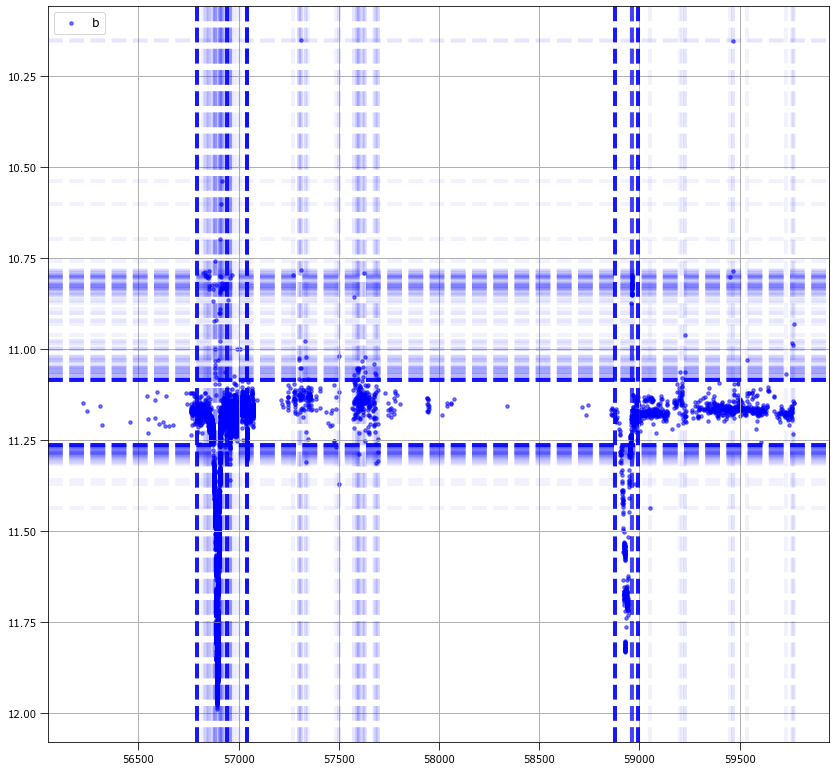

Length Original: 12125 12125
Removing: 178 178
Length New: 11947 11947
Length Original: 11947 11947
Removing: 60 60
Length New: 11887 11887
N filtered points: 0


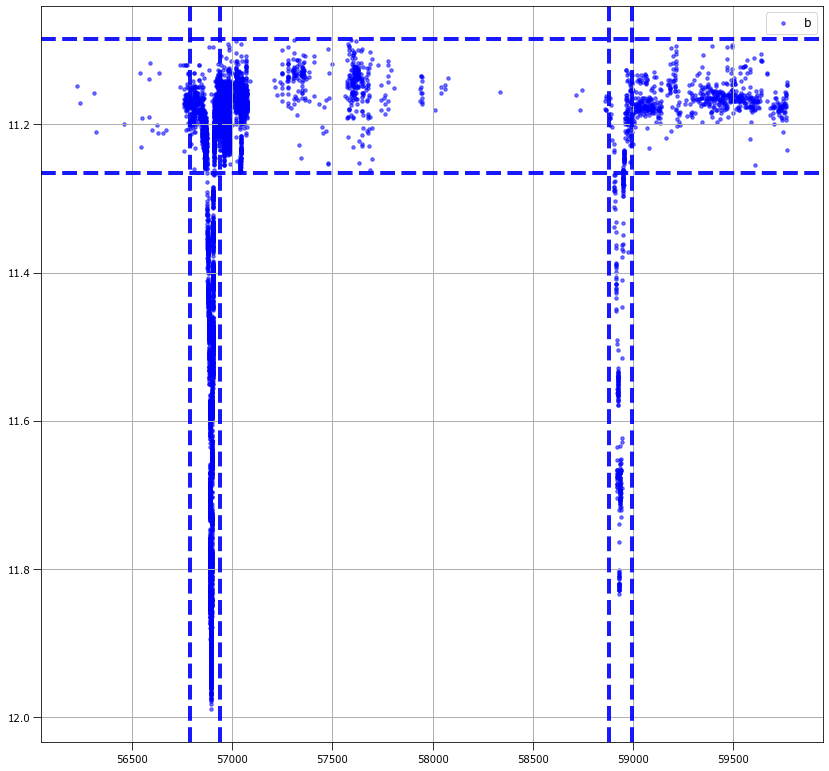

N filtered points: 127


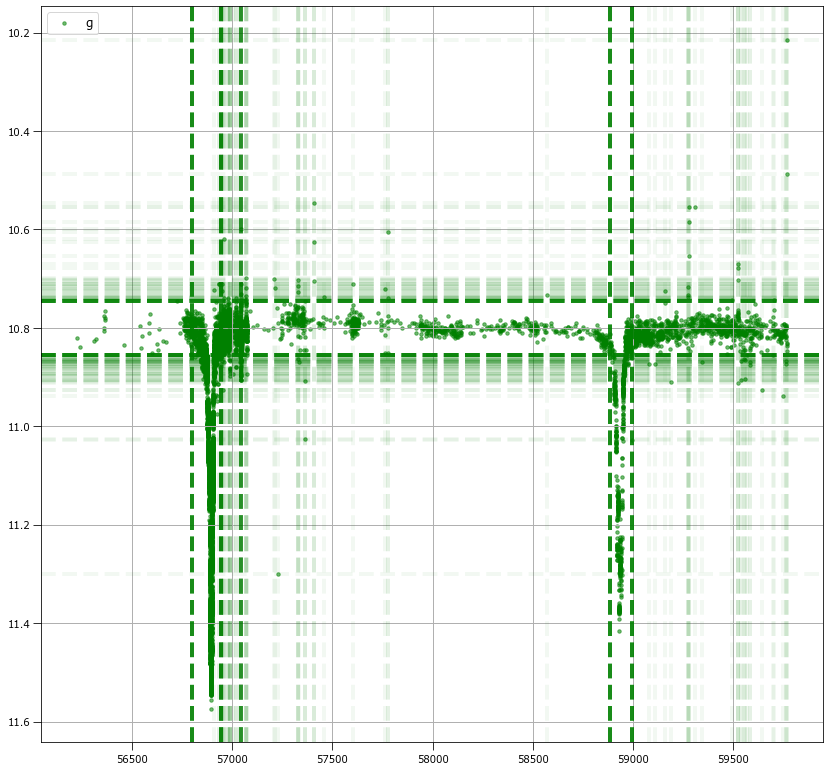

Length Original: 14939 14939
Removing: 127 127
Length New: 14812 14812
Length Original: 14812 14812
Removing: 75 75
Length New: 14737 14737
N filtered points: 0


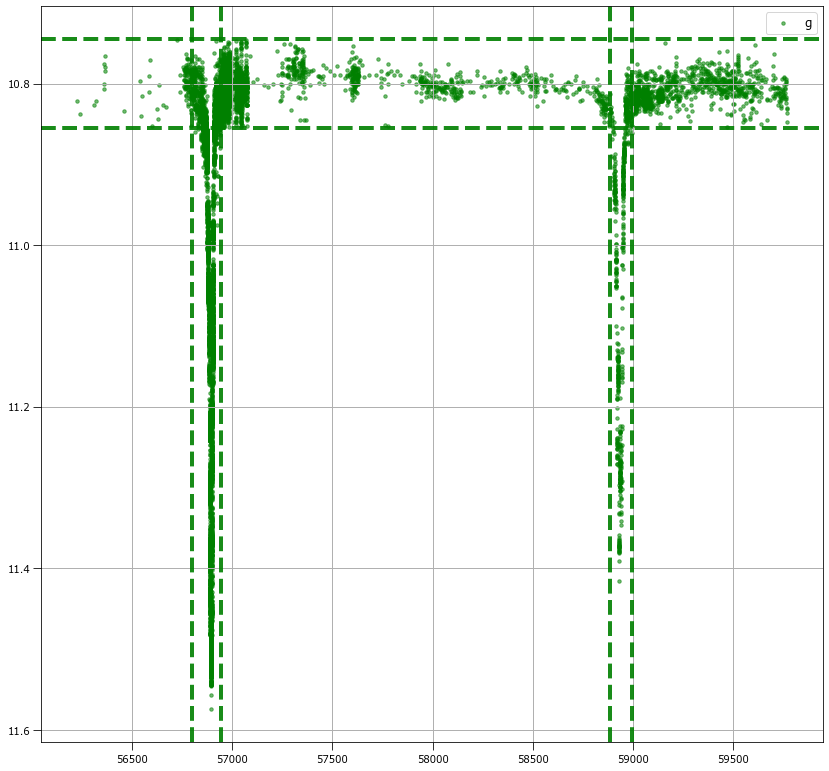

N filtered points: 52


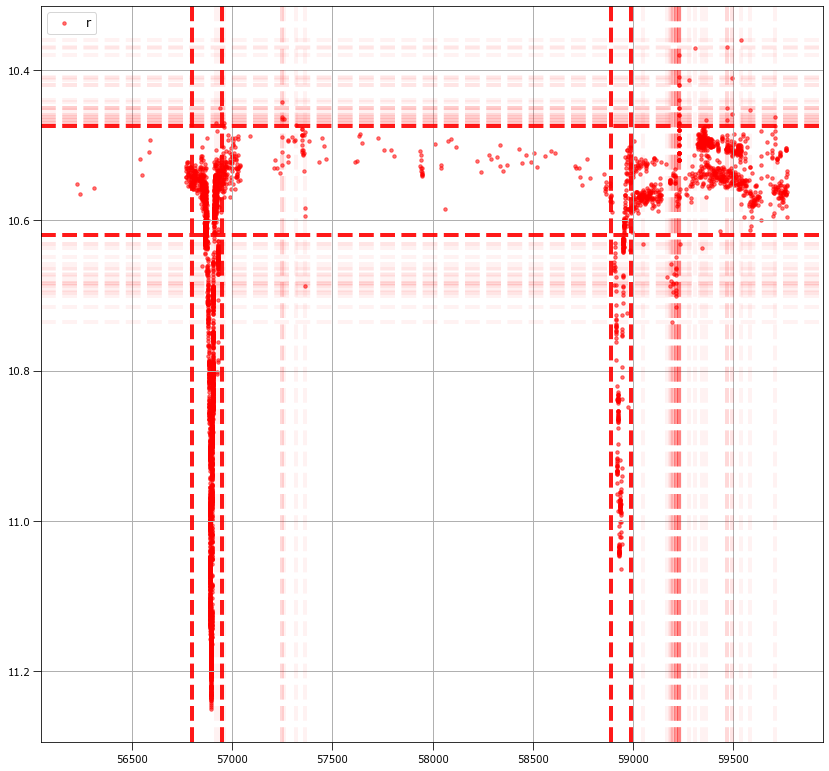

Length Original: 5215 5215
Removing: 52 52
Length New: 5163 5163
Length Original: 5163 5163
Removing: 18 18
Length New: 5145 5145
N filtered points: 0


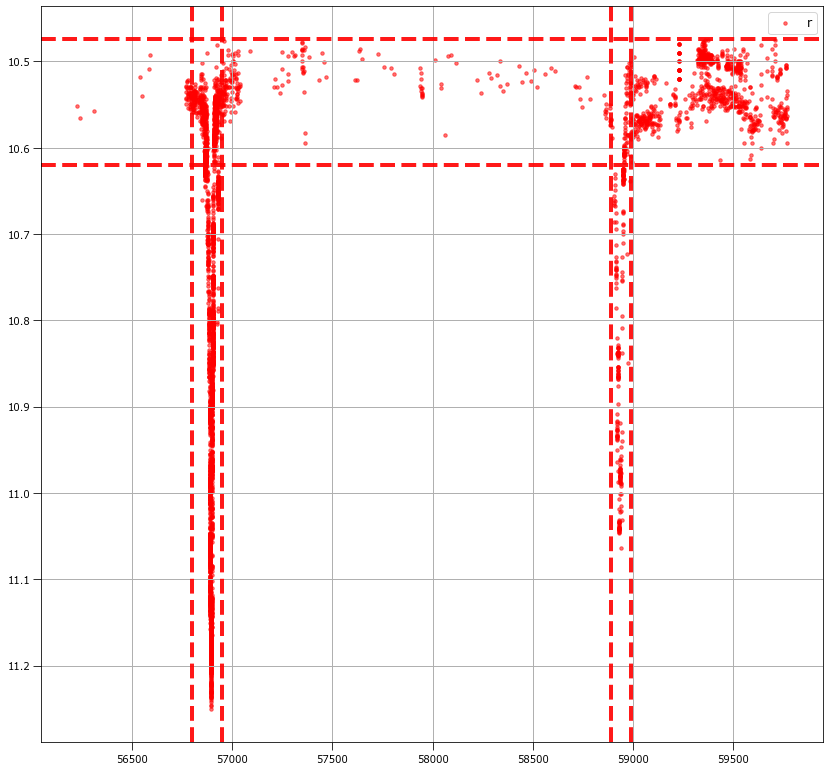

N filtered points: 115


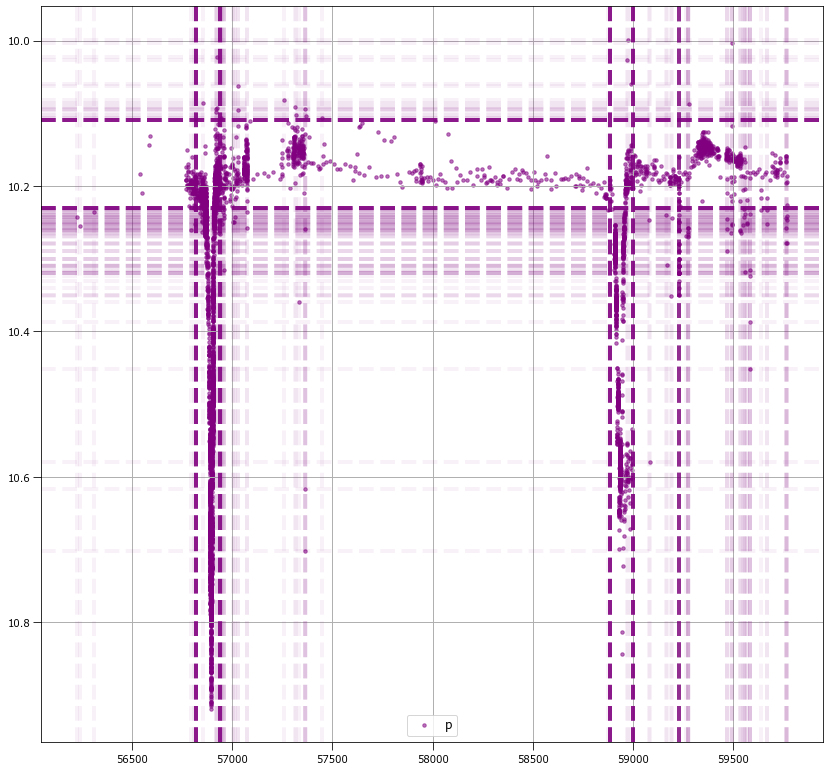

Length Original: 6091 6091
Removing: 115 115
Length New: 5976 5976
Length Original: 5976 5976
Removing: 67 67
Length New: 5909 5909
N filtered points: 0


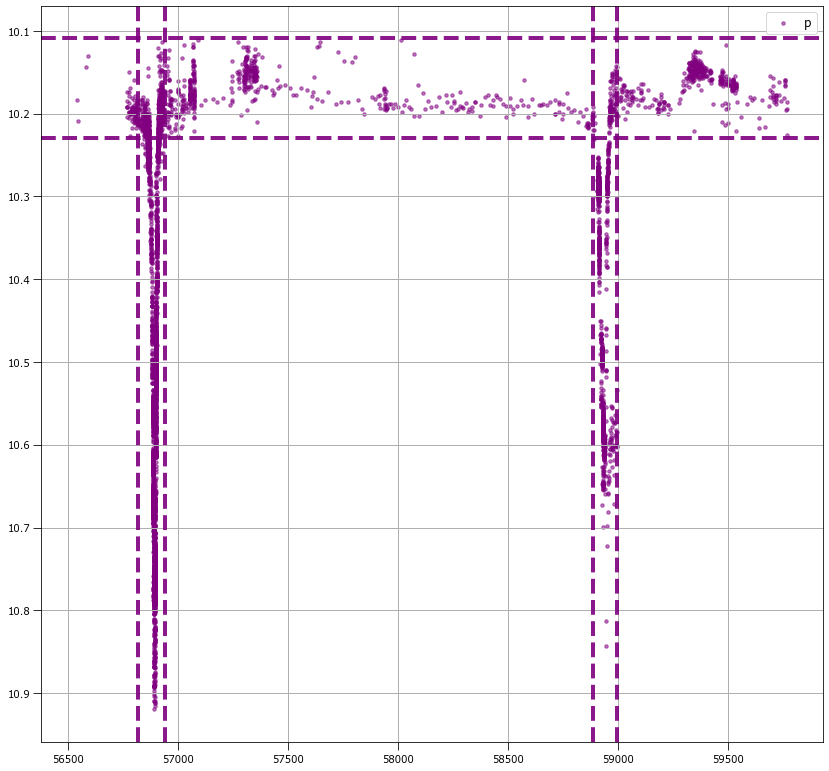

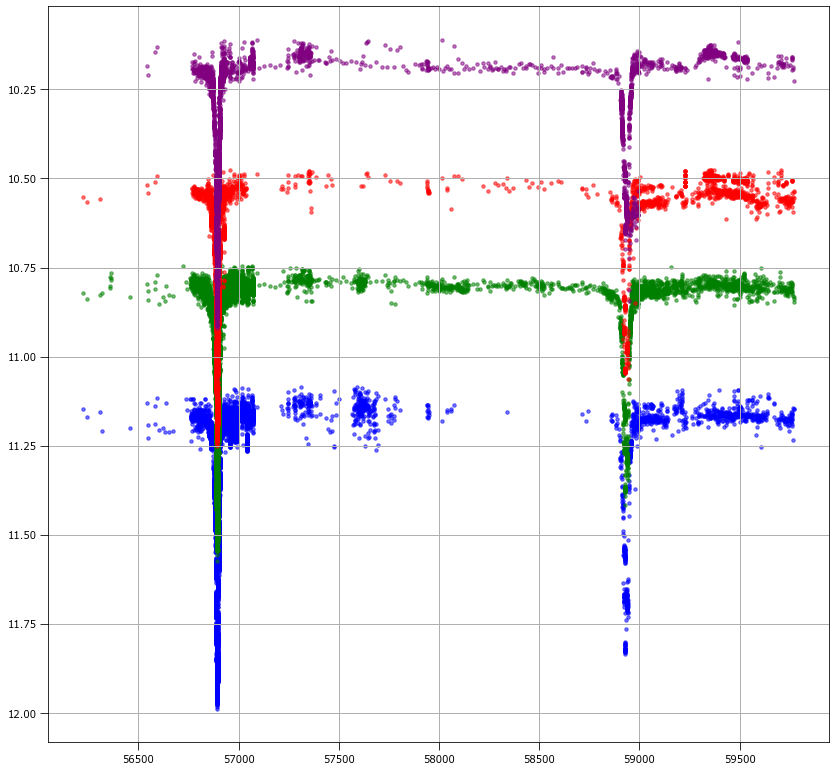

In [22]:
tm_pd = Time(lod[0][12], scale='utc',format='mjd')
tm_pa = Time(lod[0][12], scale='utc',format='mjd')

cleaned_light_curve, samp_MJD= funcs_light_curve.EECep_light_curve_loader_n_cleaner((lod[0][8], lod[0][9], tm_pa, 'PA'))

new_arr = []

for k in range(0, len(samp_MJD)-1):
        thingy= Time(samp_MJD[k], scale='utc',format='mjd') 
        new_arr.append(Time(samp_MJD[k], scale='utc',format='mjd') )

new_arr.append(samp_MJD[-1])

In [30]:
type(lod[0][8]), type(lod[0][9]), type(tm_pa)

(pandas.core.series.Series, pandas.core.series.Series, astropy.time.core.Time)

In [29]:
len(EECep_pa), len(EECep_pa_err), len(EECep_PA_MJD_track), type(EECep_pa), type(EECep_pa_err), type(EECep_PA_MJD_track)

(41, 41, 41, numpy.ndarray, list, astropy.time.core.Time)

<Figure size 1728x1296 with 0 Axes>

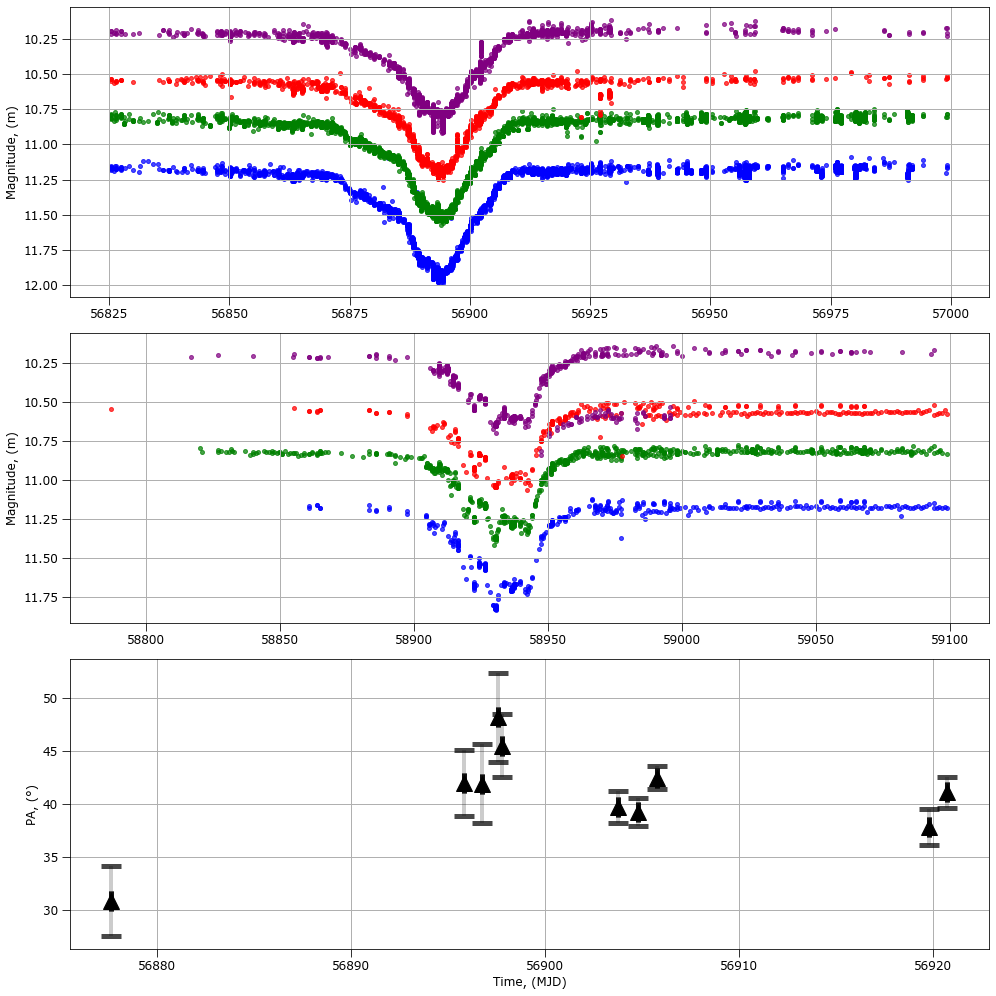

In [23]:
funcs_light_curve.EECep_light_curve_split_B((lod[0][8], lod[0][9], tm_pa, 'PA'), (56825 , 57000) , (58820 , 59100) , (56825 , 57000), cleaned_light_curve, new_arr ,False ,True, False, 'o' , '^', True, False)

In [ ]:
#Now run for PD

Reading: ee_cep_2014.txt


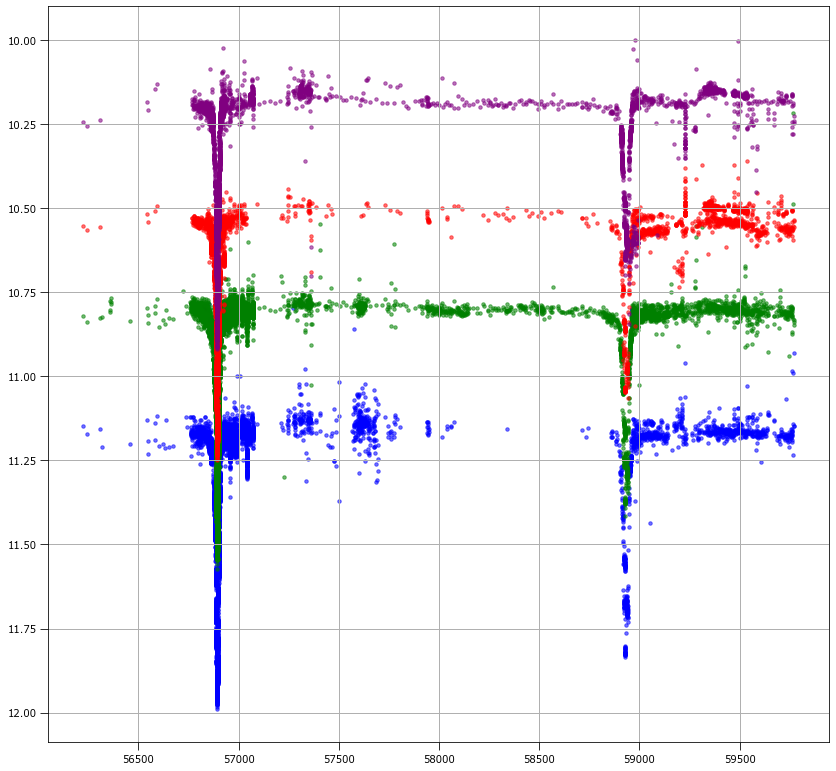

N filtered points: 178


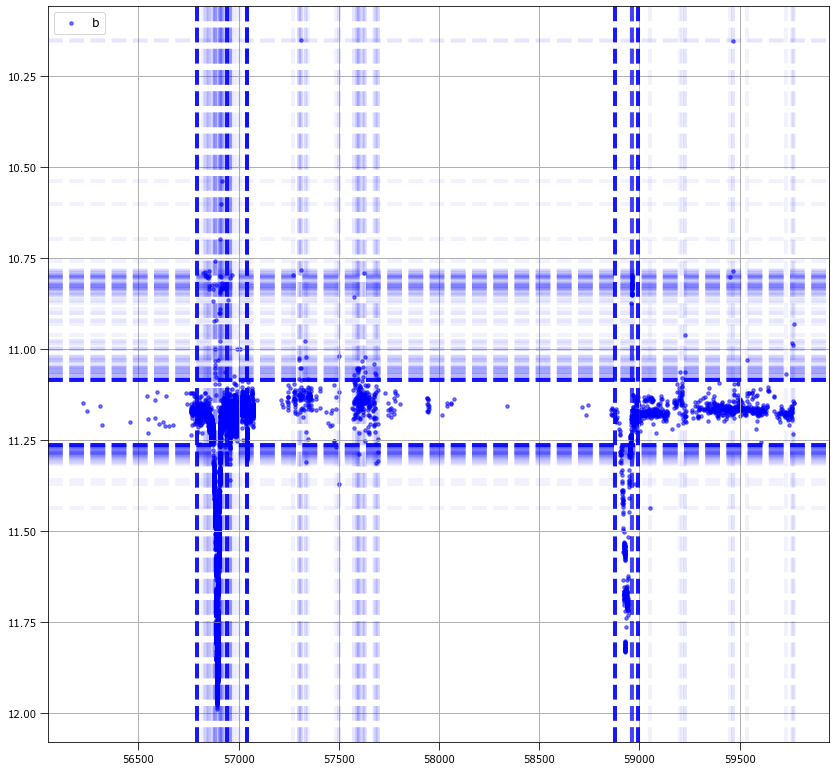

Length Original: 12125 12125
Removing: 178 178
Length New: 11947 11947
Length Original: 11947 11947
Removing: 60 60
Length New: 11887 11887
N filtered points: 0


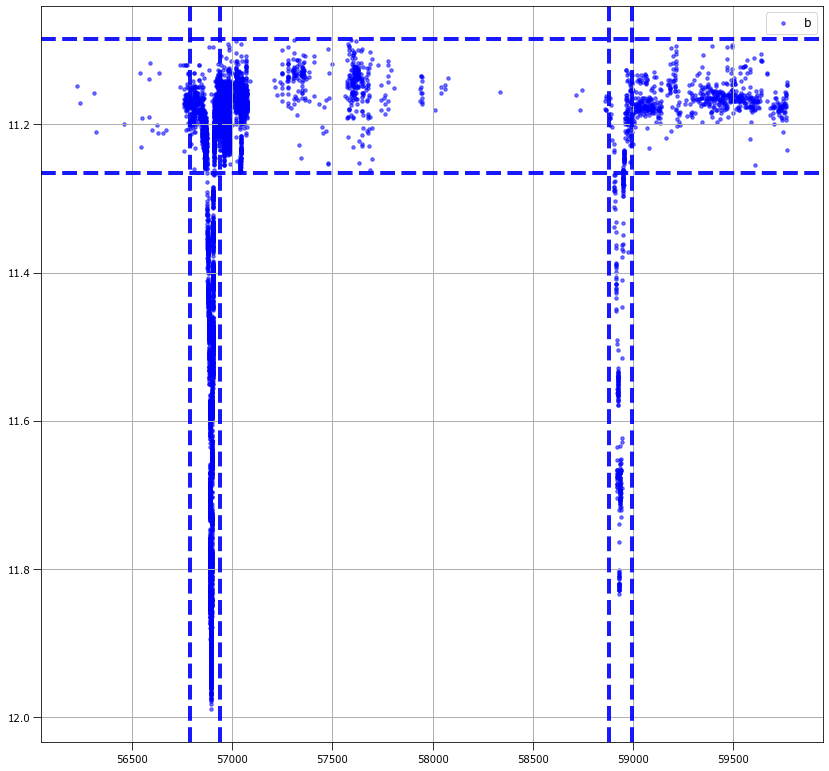

N filtered points: 127


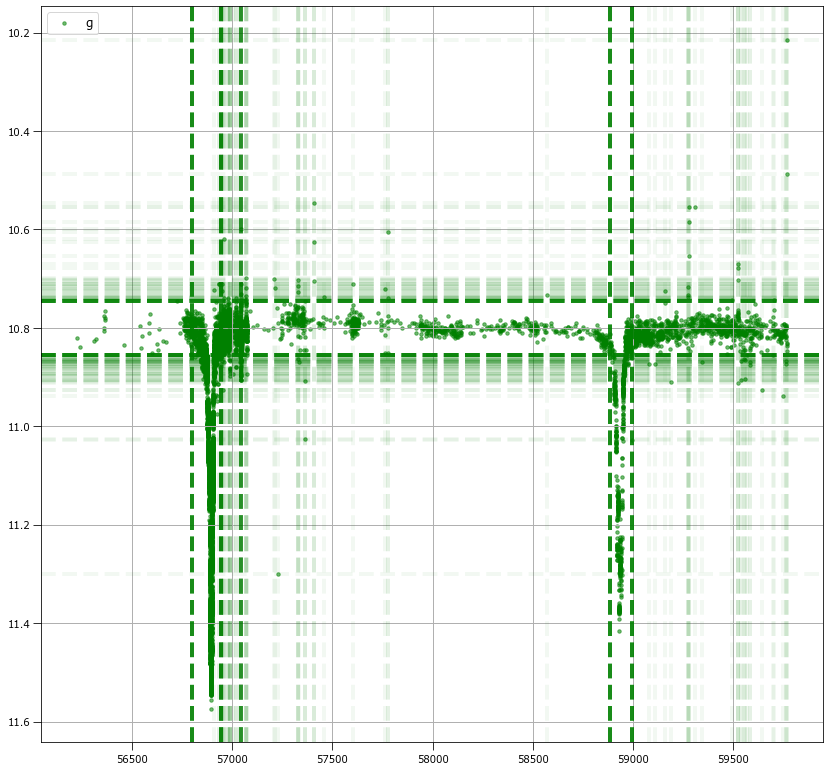

Length Original: 14939 14939
Removing: 127 127
Length New: 14812 14812
Length Original: 14812 14812
Removing: 75 75
Length New: 14737 14737
N filtered points: 0


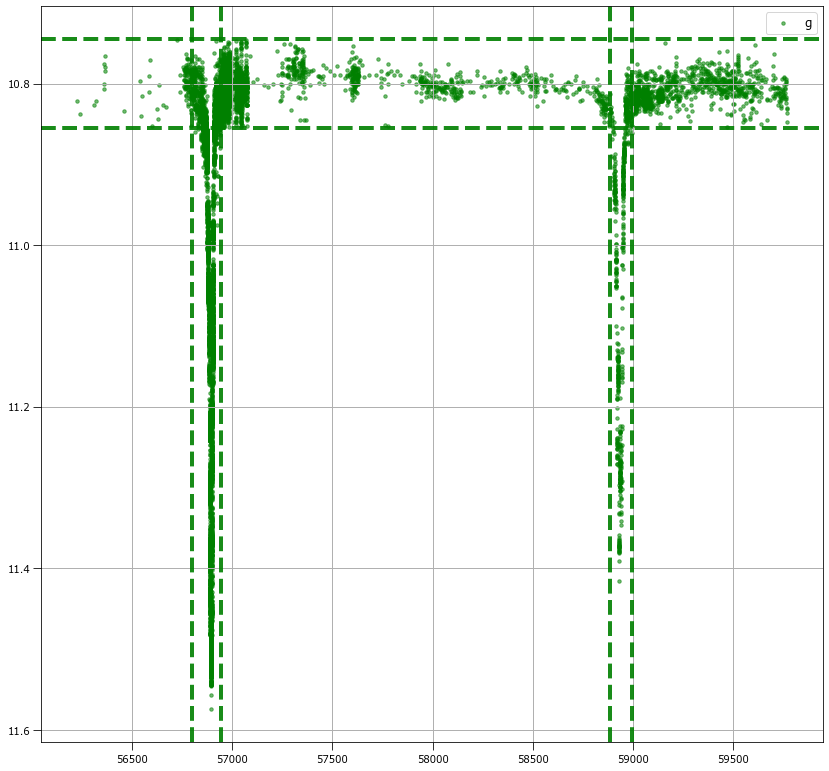

N filtered points: 52


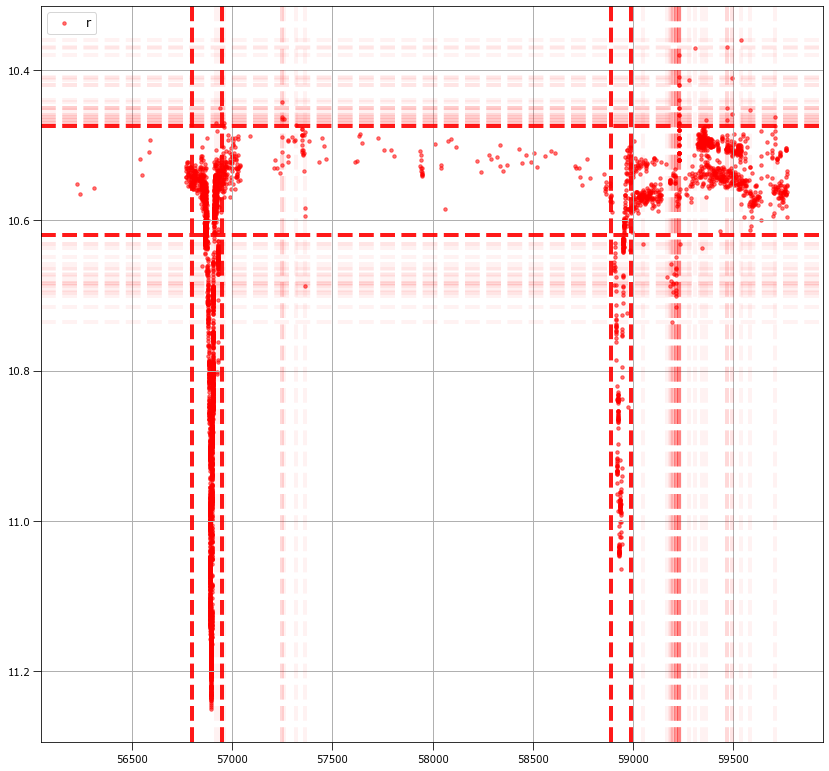

Length Original: 5215 5215
Removing: 52 52
Length New: 5163 5163
Length Original: 5163 5163
Removing: 18 18
Length New: 5145 5145
N filtered points: 0


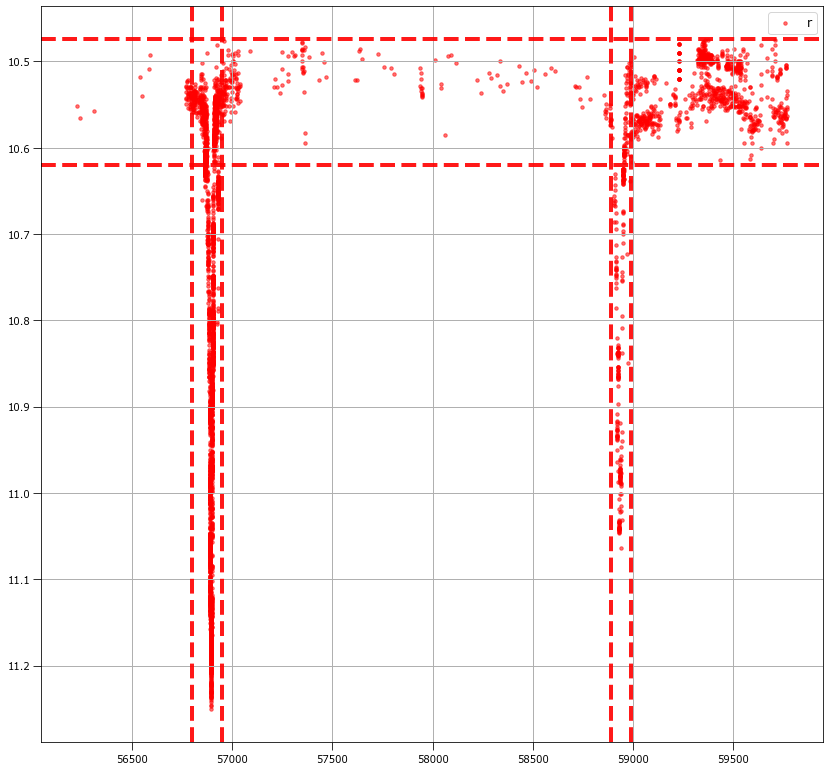

N filtered points: 115


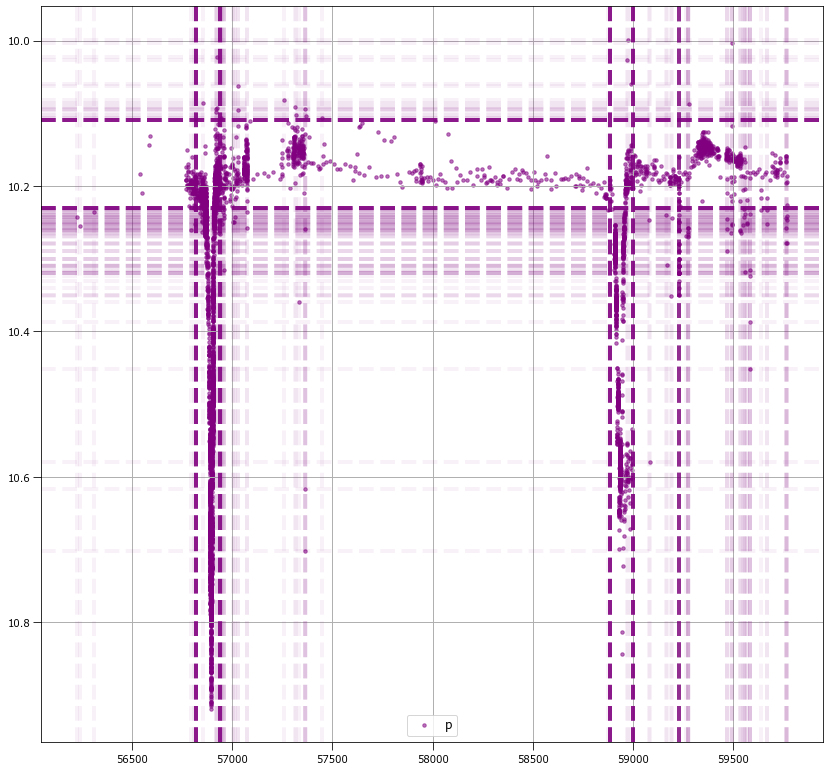

Length Original: 6091 6091
Removing: 115 115
Length New: 5976 5976
Length Original: 5976 5976
Removing: 67 67
Length New: 5909 5909
N filtered points: 0


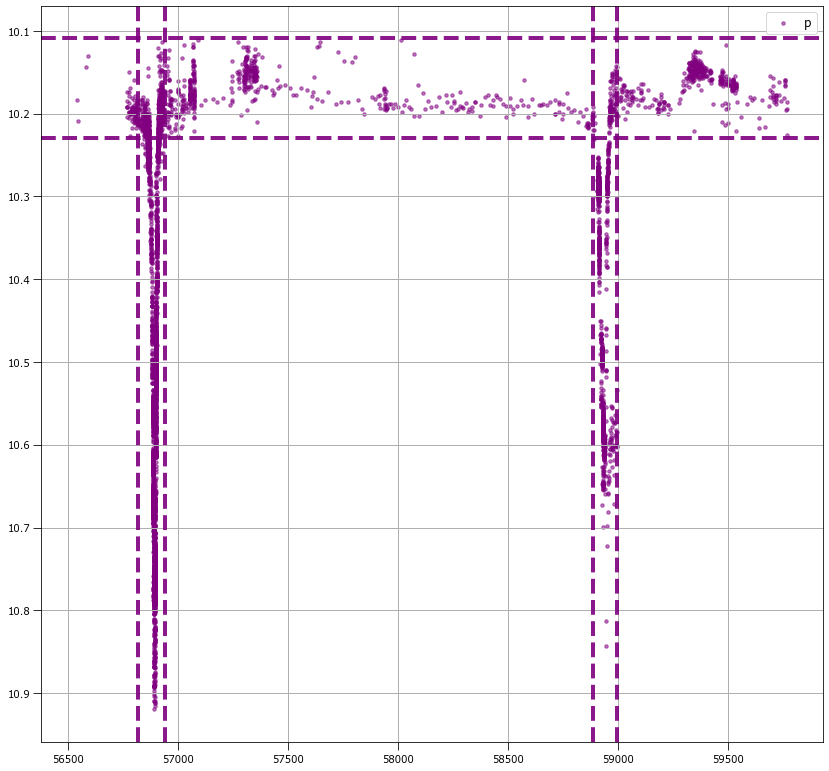

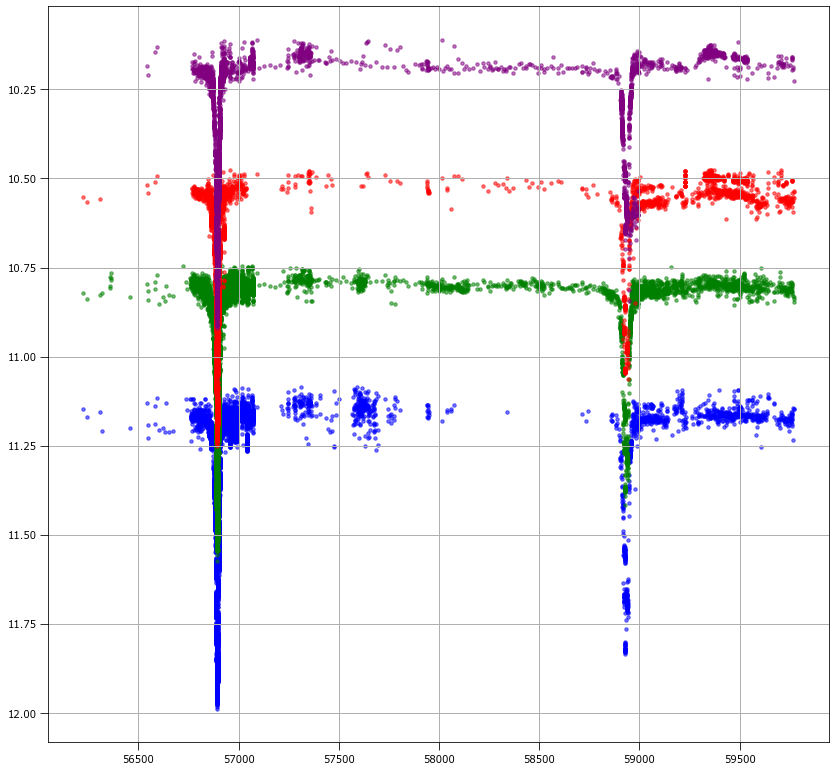

In [32]:
cleaned_light_curve, samp_MJD= funcs_light_curve.EECep_light_curve_loader_n_cleaner((lod[0][6], lod[0][7], tm_pd, 'PD'))

new_arr = []

for k in range(0, len(samp_MJD)-1):
        thingy= Time(samp_MJD[k], scale='utc',format='mjd') 
        new_arr.append(Time(samp_MJD[k], scale='utc',format='mjd') )

new_arr.append(samp_MJD[-1])

In [ ]:
#ok it is cleaned

<Figure size 1728x1296 with 0 Axes>

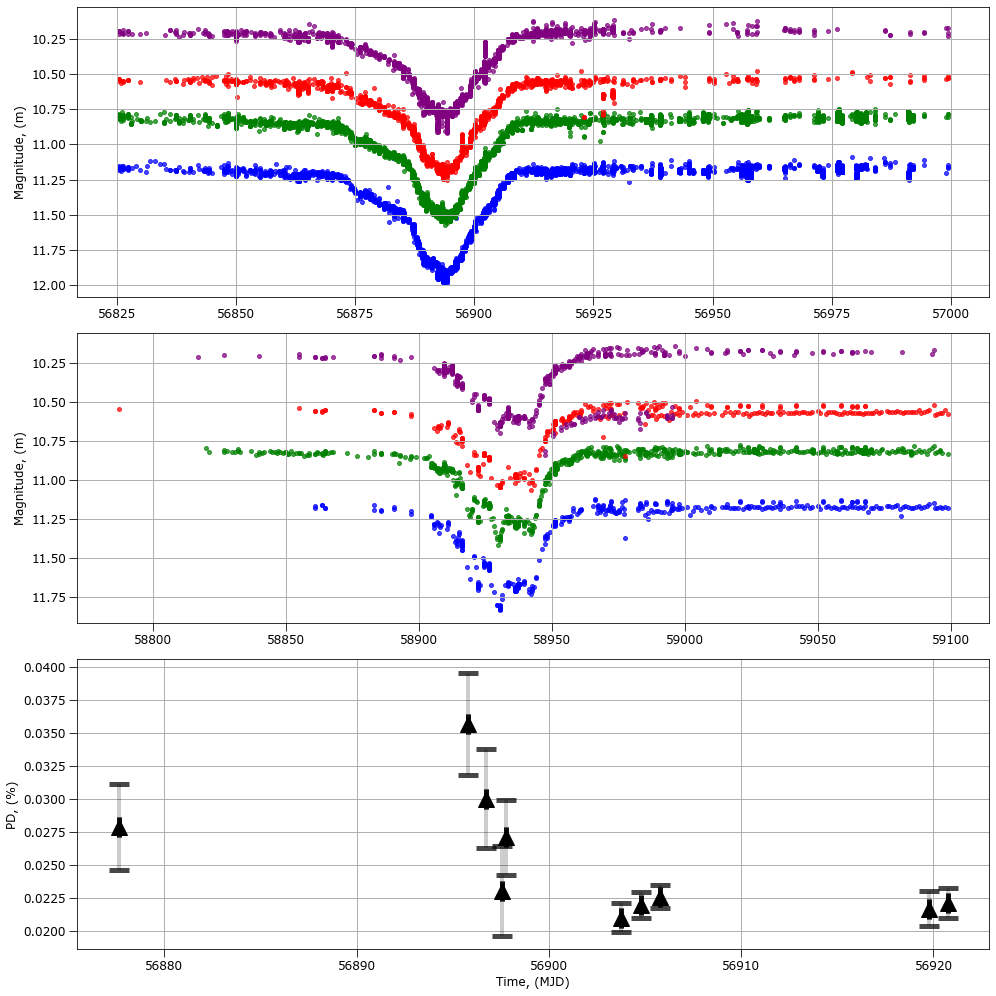

In [33]:
funcs_light_curve.EECep_light_curve_split_B((lod[0][6], lod[0][7], tm_pa, 'PD'), (56825 , 57000) , (58820 , 59100) , (56825 , 57000), cleaned_light_curve, new_arr ,False ,True, False, 'o' , '^', True, False)